# IoU / Dice coefficient

In [4]:
import os
import math

import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from glob import glob

os.environ['CUDA_VISIBLE_DEVICES'] = '0'

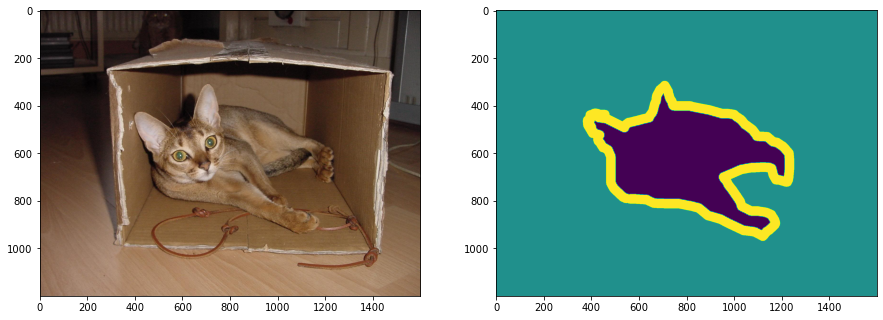

In [5]:
image_files = glob('data/images/*.jpg')
image_path = image_files[134]
seg_path = image_path.replace('images', 'annotations/trimaps')
seg_path = seg_path.replace('jpg', 'png')

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
seg_map = cv2.imread(seg_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(seg_map)
plt.show()

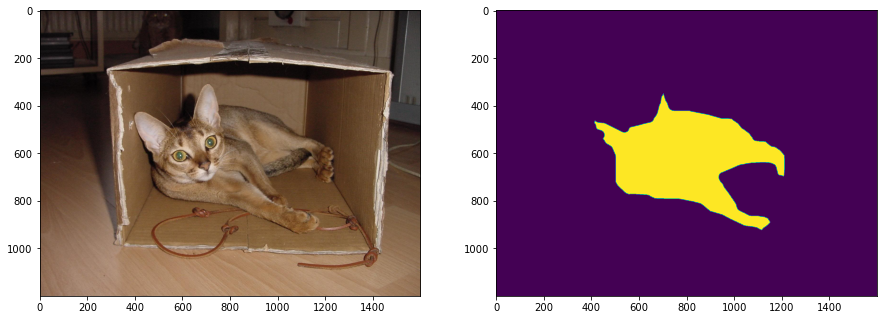

In [6]:
seg_map[seg_map != 1] = 0
plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(seg_map)
plt.show()

# IoU / Jaccard Index
IoU = Area of Overlap / Area of Union

In [7]:
import tensorflow.keras.losses as losses


'''
y_true = | 0 | 1 | 1 | 0 |
y_pred = | 0.5 | 1 | 0.2 | 0.3 |
y_ture * y_pred = | 0 | 1 | 0.2 | 0 | -> 1.2
'''
def iou(y_true, y_pred):
    smooth = 1.
    
    # Flatten
    y_true = tf.reshape(y_true, [-1])
    y_pred = tf.reshape(y_pred, [-1])
    
    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) - intersection
    
    score = intersection / (union + smooth)
    
    return score
    
def dice_coef(y_true, y_pred):
    smooth = 1.
    
    # Flatten
    y_true = tf.reshape(y_true, [-1])
    y_pred = tf.reshape(y_pred, [-1])
    
    intersection = tf.reduce_sum(y_true * y_pred)
    
    score = (2. * intersection) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) + smooth)
    
    return score

def dice_loss(y_true, y_pred):
    loss = 1 - dice_coef(y_true, y_pred)
    
    return loss
    
def bce_dice_loss(y_true, y_pred):
    loss = 1. * losses.binary_crossentropy(y_true, y_pred) + 1. * dice_loss(y_true, y_pred)
    
    return loss

In [8]:
print(dice_coef(seg_map.astype('float32'), seg_map.astype('float32')).numpy())
print(iou(seg_map.astype('float32'), seg_map.astype('float32')).numpy())

0.99999756
0.9999952


In [9]:
zeros = np.zeros_like(seg_map)
print(dice_coef(seg_map.astype('float32'), zeros.astype('float32')).numpy())
print(iou(seg_map.astype('float32'), zeros.astype('float32')).numpy())

0.0
0.0


In [10]:
ones = np.ones_like(seg_map)
print(dice_coef(seg_map.astype('float32'), ones.astype('float32')).numpy())
print(iou(seg_map.astype('float32'), ones.astype('float32')).numpy())

0.19420812
0.10754734
